##### Next update of this network contains:
- normal costs
- proper nodes at one-way bridges, adding bridges to network

In [1]:
import random
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from transport_network_analysis import core

In [3]:
#Show with attributes 
graph = gpd.read_file('edges_water.shp')
print(graph.iloc[3]['cost'])
print(graph.head()) # see what attrinutes the edges and nodes from the shapefile contain

6.68129704879482
         cost  source  target  source_aan  target_aan      width  \
0    2.483749     5.0     3.0         3.0         3.0  24.797941   
1  101.826942     5.0   254.0         3.0         3.0  17.942054   
2   11.685232   212.0   217.0         3.0         3.0  10.357033   
3    6.681297   212.0   215.0         3.0         3.0   4.825559   
4    5.221776   215.0   213.0         3.0         3.0   4.365561   

                                            geometry  
0  LINESTRING (120005.5486256767 487357.479141514...  
1  LINESTRING (120005.5486256767 487357.479141514...  
2  LINESTRING (120071.6506543915 487249.971786562...  
3  LINESTRING (120071.6506543915 487249.971786562...  
4  LINESTRING (120074.1340182582 487243.773574981...  


In [4]:
G=nx.read_shp('edges_water.shp', simplify=True) # use simplify is true otherwise chart get shifted
w_G = nx.Graph()
color_map = []
lat_lon_to_index = {}
h = list(G.nodes(data=True)) # in de shapefile nodes are positioned as lonlat instead of latlon
print (h[1])
for i, node in enumerate(G.nodes()): #adds nodes with label 1 till n nodes to the network. 
    w_G.add_node(i, pos= node, color = "b")
    lat_lon_to_index[node] = i
    color_map.append('b')
    
for edge in G.edges(data=True): # adds edges with attributes to the graph from shapefile according to the order in which the edges are ordered in the shapefile
    w_G.add_edge(lat_lon_to_index[edge[0]], lat_lon_to_index[edge[1]], dis=edge[2]['cost'] )


c =list(w_G.nodes(data = True))
j = list(w_G.edges(data = True))

print(c[1])
print(j[1])


((120004.68444248935, 487355.15197005717), {})
(1, {'pos': (120004.68444248935, 487355.15197005717), 'color': 'b'})
(0, 2, {'dis': 101.826941795037})


Color_map is for following vessels. nx.draw assigns colors to the order in the graph which they have been added. Therefore, whenever a node is added, so need to add a color "r" to the list. If you later add nodes, then give them anorther color. Whenever nx.draw is active, it will add colors to nodes according to the order in which they have been added.
    

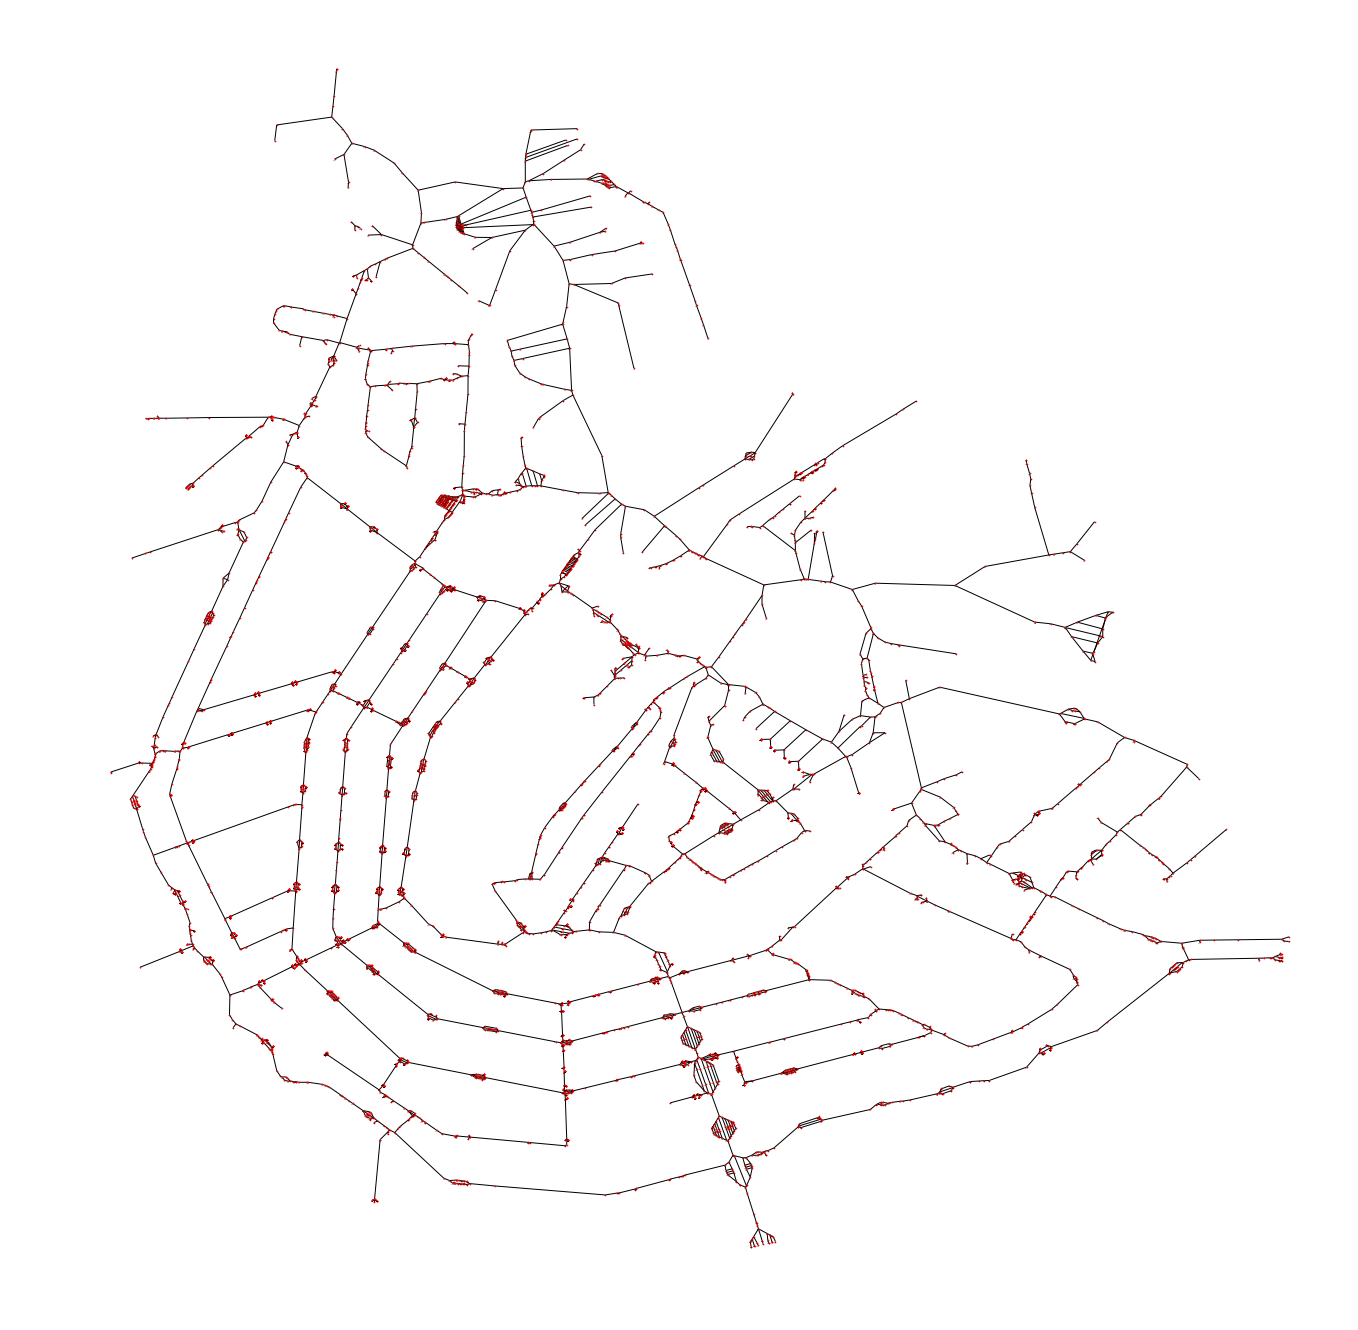

In [5]:
#prints network according to the order in the shapefile
plt.figure(figsize=(18,18))
nx.draw(w_G, nx.get_node_attributes(w_G, 'pos'), with_labels=True, node_size=0.5, font_size = 0.5)
plt.savefig('Amsterdam_Canals_8.pdf', format='pdf', rasterized=False)
plt.show()

In [6]:
labels = nx.get_edge_attributes(w_G,'dis')

In [7]:
# print network with edge attributes
"""plt.figure(figsize=(20,20))
nx.draw(w_G,nx.get_node_attributes(w_G, 'pos'), node_size=2)
nx.draw_networkx_edge_labels(w_G,nx.get_node_attributes(w_G, 'pos'),edge_labels=labels, font_size = 0.5 )
nx.draw_networkx_labels(w_G,nx.get_node_attributes(w_G, 'pos'), font_size = 3)
plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_2.pdf', format='pdf', rasterized=False)
plt.show()"""

"plt.figure(figsize=(20,20))\nnx.draw(w_G,nx.get_node_attributes(w_G, 'pos'), node_size=2)\nnx.draw_networkx_edge_labels(w_G,nx.get_node_attributes(w_G, 'pos'),edge_labels=labels, font_size = 0.5 )\nnx.draw_networkx_labels(w_G,nx.get_node_attributes(w_G, 'pos'), font_size = 3)\nplt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_2.pdf', format='pdf', rasterized=False)\nplt.show()"

In [8]:
path = nx.dijkstra_path(w_G, 54, 5763, weight = 'dis')
print(path)

[54, 55, 56, 57, 83, 84, 99, 100, 108, 225, 334, 655, 664, 677, 705, 711, 729, 730, 734, 736, 837, 798, 757, 756, 731, 679, 732, 846, 860, 902, 903, 936, 948, 971, 1006, 1037, 929, 1045, 1331, 1334, 1414, 1416, 1556, 1559, 1565, 1671, 1677, 2107, 2081, 2111, 2112, 2141, 2161, 2210, 2231, 2318, 2304, 2323, 2366, 2389, 2395, 2446, 2454, 2493, 2502, 2690, 2693, 2716, 2718, 2720, 2747, 2750, 2800, 2884, 2887, 2898, 2918, 2925, 2934, 2959, 2960, 2969, 2970, 2979, 2982, 2996, 2995, 2999, 3000, 3015, 3021, 3044, 3047, 3053, 3059, 3072, 3092, 3093, 3118, 3232, 3233, 3138, 3333, 3365, 3394, 3451, 3454, 3472, 3480, 3493, 3503, 3553, 3563, 3573, 3608, 3620, 3640, 3649, 3642, 3650, 3693, 3701, 3708, 3709, 3717, 3718, 3729, 3732, 3737, 3739, 3744, 3768, 3778, 3781, 3792, 3801, 3865, 3926, 4014, 4017, 4024, 4032, 4039, 4046, 4049, 4080, 4201, 4213, 4230, 4257, 4106, 4290, 4304, 4302, 4330, 4436, 4352, 4488, 4594, 4611, 4660, 4685, 4631, 4710, 4735, 4662, 4747, 4795, 4901, 5014, 5029, 5045, 5064, 510

In [9]:
distance = ((nx.get_node_attributes(w_G, 'pos')[4091][0]-nx.get_node_attributes(w_G, 'pos')[4013][0])**2+(nx.get_node_attributes(w_G, 'pos')[4091][1]-nx.get_node_attributes(w_G, 'pos')[4013][1])**2)**0.5
print(distance)
# check if this is correct with distance measured in maps and one that is attribute on the egde

54.82911876380231


In [10]:
#print(geopy.distance.distance(nx.get_node_attributes(w_G, 'pos')[4013],nx.get_node_attributes(w_G, 'pos')[4091])*1000)

## Code voor lat lon positionering van een vessel

Aangezien de coordinaten van deze file in xy staan weergeven, kan de code van prof Mark direct worden gebruikt om de afstand te berekenen.

In [12]:
#print ('path: ', path)

In [13]:
# get the Dijkstra path a few cells up
# path = ['a', 'b', 'd', 'f', 'g', 'h'] 
time = 0
timestep = 1

# start to move at path[0]
k = len(list(w_G.nodes))
vessel_pos = nx.get_node_attributes(w_G, 'pos')[path[0]] 
w_G.add_node(k, pos=vessel_pos, time = timestep); color_map.append('r')

# we need to keep track of the to_node_id
to_node_id = 1

In [14]:
k = len(list(w_G.nodes)) + 1  
while to_node_id<len(path)-1:
    # run this cell with cntrl+enter, or in a while loop to take timesteps
    # termine move
    time = time + timestep
    speed = 20
    move = timestep * speed
    vessel_pos, to_node_id = core.Move_on_path(w_G, vessel_pos, path, to_node_id, move, True)
    w_G.add_node(k, pos=vessel_pos, time = time); color_map.append('r') #nodes are listed as 1 til n nodes, so in order to not mess up the nx.draw, the new node id's
    # must continue from the last node in the original file. Therefore k is as a counter added.
    k = k +1
    

distance : 7.7609698054684575
distance_to_next_node:  7.7609698054684575
move:  20
move:  12.239030194531543
new_node : (120141.79151730212, 488768.078992292)
vessel_pos_new: (120141.79151730212, 488768.078992292)
to_node_id : 2

distance : 7.867271787554312
distance_to_next_node:  7.867271787554312
move:  20
move:  12.132728212445688
new_node : (120146.7295829283, 488765.2242861382)
vessel_pos_new: (120146.7295829283, 488765.2242861382)
to_node_id : 3

distance : 3.771810239356723
distance_to_next_node:  3.771810239356723
move:  20
move:  16.228189760643275
new_node : (120166.18392432226, 488761.1623532155)
vessel_pos_new: (120166.18392432226, 488761.1623532155)
to_node_id : 4

distance : 15.554167875935432
distance_to_next_node:  15.554167875935432
move:  20
move:  4.445832124064568
new_node : (120155.5968607629, 488765.2092782607)
vessel_pos_new: (120155.5968607629, 488765.2092782607)
to_node_id : 5

distance : 10.50916247189794
distance_to_next_node:  10.50916247189794
move:  20
mo

new_node : (120774.12241606791, 488435.86191465624)
vessel_pos_new: (120774.12241606791, 488435.86191465624)
to_node_id : 37

distance : 15.461803106093347
distance_to_next_node:  15.461803106093347
move:  20
move:  4.538196893906653
new_node : (120786.3625048112, 488420.9861276376)
vessel_pos_new: (120786.3625048112, 488420.9861276376)
to_node_id : 38

distance : 4.437723755275825
distance_to_next_node:  4.437723755275825
move:  20
move:  15.562276244724174
new_node : (120796.8811486158, 488414.66178984876)
vessel_pos_new: (120796.8811486158, 488414.66178984876)
to_node_id : 39

distance : 15.700663480624996
distance_to_next_node:  15.700663480624996
move:  20
move:  4.299336519375004
new_node : (120812.55660163162, 488403.3441172728)
vessel_pos_new: (120812.55660163162, 488403.3441172728)
to_node_id : 40

distance : 4.196652757525508
distance_to_next_node:  4.196652757525508
move:  20
move:  15.80334724247449
new_node : (120819.98622882745, 488393.12398972525)
vessel_pos_new: (120819

new_node : (121277.70548962412, 488042.98825159896)
vessel_pos_new: (121277.70548962412, 488042.98825159896)
to_node_id : 69

distance : 1.4945789033269221
distance_to_next_node:  1.4945789033269221
move:  20
move:  18.50542109667308
new_node : (121287.98931819538, 488029.1618300977)
vessel_pos_new: (121287.98931819538, 488029.1618300977)
to_node_id : 70

distance : 15.026052128680197
distance_to_next_node:  15.026052128680197
move:  20
move:  4.973947871319803
new_node : (121283.46913441017, 488040.5417722689)
vessel_pos_new: (121283.46913441017, 488040.5417722689)
to_node_id : 71

distance : 26.806679122225805
distance_to_next_node:  26.806679122225805
move:  20
new_node : (121303.43903704321, 488039.4449637956)
vessel_pos_new: (121303.43903704321, 488039.4449637956)
to_node_id : 71

distance : 6.806679122226902
distance_to_next_node:  6.806679122226902
move:  20
move:  13.193320877773097
new_node : (121322.59818463695, 488034.46439741954)
vessel_pos_new: (121322.59818463695, 488034.

distance : 8.412085946465485
distance_to_next_node:  8.412085946465485
move:  20
move:  11.587914053534515
new_node : (121644.19674699729, 487999.74969914736)
vessel_pos_new: (121644.19674699729, 487999.74969914736)
to_node_id : 105

distance : 4.972099169123961
distance_to_next_node:  4.972099169123961
move:  20
move:  15.027900830876039
new_node : (121656.20041589745, 487999.2095955143)
vessel_pos_new: (121656.20041589745, 487999.2095955143)
to_node_id : 106

distance : 4.475606846220648
distance_to_next_node:  4.475606846220648
move:  20
move:  15.524393153779352
new_node : (121664.4658642161, 487991.476204921)
vessel_pos_new: (121664.4658642161, 487991.476204921)
to_node_id : 107

distance : 7.95036430318009
distance_to_next_node:  7.95036430318009
move:  20
move:  12.049635696819909
new_node : (121667.5549025527, 487988.76709871134)
vessel_pos_new: (121667.5549025527, 487988.76709871134)
to_node_id : 108

distance : 3.895795120527169
distance_to_next_node:  3.895795120527169
move:

move:  20
move:  8.369889307372134
new_node : (121940.85096871205, 487819.19126675336)
vessel_pos_new: (121940.85096871205, 487819.19126675336)
to_node_id : 141

distance : 6.26042487802366
distance_to_next_node:  6.26042487802366
move:  20
move:  13.73957512197634
new_node : (121948.35226039494, 487818.9872677327)
vessel_pos_new: (121948.35226039494, 487818.9872677327)
to_node_id : 142

distance : 11.333677780289854
distance_to_next_node:  11.333677780289854
move:  20
move:  8.666322219710146
new_node : (121945.69153034668, 487819.1779233624)
vessel_pos_new: (121945.69153034668, 487819.1779233624)
to_node_id : 143

distance : 7.99197746935039
distance_to_next_node:  7.99197746935039
move:  20
move:  12.00802253064961
new_node : (121949.57971728897, 487821.7951002284)
vessel_pos_new: (121949.57971728897, 487821.7951002284)
to_node_id : 144

distance : 0.243903657979785
distance_to_next_node:  0.243903657979785
move:  20
move:  19.756096342020214
new_node : (121968.15339571248, 487815.7

move:  20
move:  12.949611487689854
new_node : (122433.342055138, 487483.7324534826)
vessel_pos_new: (122433.342055138, 487483.7324534826)
to_node_id : 169

distance : 19.242883349544215
distance_to_next_node:  19.242883349544215
move:  20
move:  0.7571166504557851
new_node : (122451.50092416762, 487476.98995250376)
vessel_pos_new: (122451.50092416762, 487476.98995250376)
to_node_id : 170

distance : 49.0594839508742
distance_to_next_node:  49.0594839508742
move:  20
new_node : (122461.84927286052, 487494.1046152036)
vessel_pos_new: (122461.84927286052, 487494.1046152036)
to_node_id : 170

distance : 29.05948395087074
distance_to_next_node:  29.05948395087074
move:  20
new_node : (122472.19762155344, 487511.2192779035)
vessel_pos_new: (122472.19762155344, 487511.2192779035)
to_node_id : 170

distance : 9.059483950859752
distance_to_next_node:  9.059483950859752
move:  20
move:  10.940516049140248
new_node : (122484.36380062647, 487526.95706331194)
vessel_pos_new: (122484.36380062647, 4

distance : 8.569537836338949
distance_to_next_node:  8.569537836338949
move:  20
move:  11.430462163661051
new_node : (122902.1821685412, 487037.4215609754)
vessel_pos_new: (122902.1821685412, 487037.4215609754)
to_node_id : 198

distance : 10.517115783003563
distance_to_next_node:  10.517115783003563
move:  20
move:  9.482884216996437
new_node : (122920.42454459665, 487029.52013669896)
vessel_pos_new: (122920.42454459665, 487029.52013669896)
to_node_id : 199

distance : 20.0250682029984
distance_to_next_node:  20.0250682029984
move:  20
new_node : (122939.57029699485, 487023.7373895052)
vessel_pos_new: (122939.57029699485, 487023.7373895052)
to_node_id : 199

distance : 0.025068202998859306
distance_to_next_node:  0.025068202998859306
move:  20
move:  19.97493179700114
new_node : (122956.83917904558, 487013.6498706975)
vessel_pos_new: (122956.83917904558, 487013.6498706975)
to_node_id : 200

distance : 2.442095399297101
distance_to_next_node:  2.442095399297101
move:  20
move:  17.557

move:  20
move:  15.739241170978914
new_node : (123464.49307309944, 486723.37738898344)
vessel_pos_new: (123464.49307309944, 486723.37738898344)
to_node_id : 231

distance : 8.793793190296315
distance_to_next_node:  8.793793190296315
move:  20
move:  11.206206809703685
new_node : (123483.79034556718, 486718.25245272566)
vessel_pos_new: (123483.79034556718, 486718.25245272566)
to_node_id : 232

distance : 27.902830569924646
distance_to_next_node:  27.902830569924646
move:  20
new_node : (123502.83043924053, 486712.1307835979)
vessel_pos_new: (123502.83043924053, 486712.1307835979)
to_node_id : 232

distance : 7.902830569926063
distance_to_next_node:  7.902830569926063
move:  20
move:  12.097169430073937
new_node : (123519.39658795418, 486701.6761509591)
vessel_pos_new: (123519.39658795418, 486701.6761509591)
to_node_id : 233

distance : 6.268691220854845
distance_to_next_node:  6.268691220854845
move:  20
move:  13.731308779145156
new_node : (123528.17258356966, 486703.13320705085)
vess

In [14]:
#print(color_map)

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',

[]

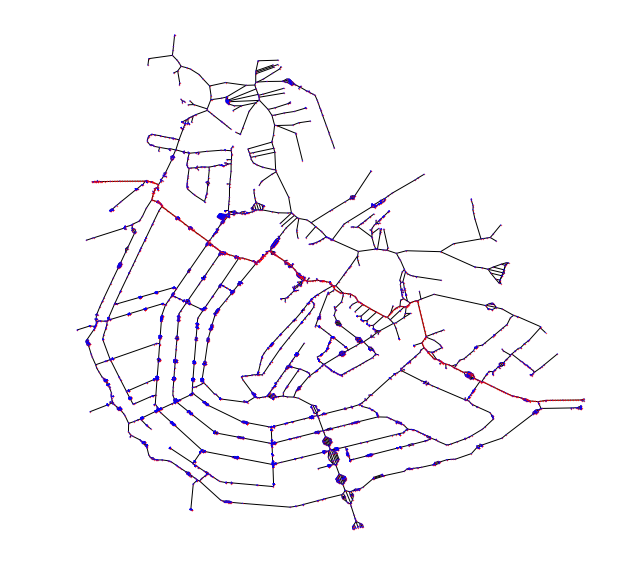

In [16]:
fig = plt.figure(figsize=(10,10))                                   
ax = plt.subplot(111)                               

nx.draw(w_G,nx.get_node_attributes(w_G, 'pos'), node_size = 0.1)
#nx.draw_networkx_edge_labels(G,nx.get_node_attributes(G, 'pos'),edge_labels=labels)
#nx.draw_networkx_labels(G,nx.get_node_attributes(G, 'pos'))
nx.draw_networkx_nodes(w_G,nx.get_node_attributes(w_G, 'pos'), node_color=color_map ,node_size = 0.1)

plt.savefig('Amsterdam_Canals_test3.pdf', format='pdf', rasterized=False)
plt.plot()
